#### Описание проекта: <br>
Вместе с отделом маркетинга был подготовлен список гипотез для увеличения выручки.
Требуется приоритизировать гипотезы, запустить A/B-тест и проанализировать результаты. <br>
#### Описание данных: <br>
_Файл /datasets/hypothesis.csv_<br>
Hypothesis — краткое описание гипотезы;<br>
Reach — охват пользователей по 10-балльной шкале;<br>
Impact — влияние на пользователей по 10-балльной шкале;<br>
Confidence — уверенность в гипотезе по 10-балльной шкале;<br>
Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.<br>
<br>
_Файл /datasets/orders.csv_<br>
transactionId — идентификатор заказа;<br>
visitorId — идентификатор пользователя, совершившего заказ;<br>
date — дата, когда был совершён заказ;<br>
revenue — выручка заказа;<br>
group — группа A/B-теста, в которую попал заказ.<br>
<br>
_Файл /datasets/visitors.csv_<br>
date — дата;<br>
group — группа A/B-теста;<br>
visitors — количество пользователей в указанную дату в указанной группе A/B-теста<br>
<br>
#### Цель проекта: <br>
Принять решение по результатам теста и объяснить его

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import datetime as dt
from matplotlib import pyplot as plt
import scipy.stats as stats

In [2]:
pd.set_option('display.max_columns', 50) 
pd.set_option('display.max_rows', 500)
pd.set_option('display.float_format', lambda x: '%.5f' % x)
pd.set_option('display.max_colwidth', False)
# параметры для корректного отображения таблиц и более удобного их анализа

# Часть 1. Приоритизация гипотез.

In [4]:
hypothesis.columns= hypothesis.columns.str.lower() #привести названия колонок к нижнему регистру

#### Рассчет ICE

In [5]:
hypothesis

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [6]:
hypothesis['ICE'] = hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']
hypothesis[['hypothesis', 'ICE']].sort_values(by='ICE', ascending=False)

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12500
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00000


#### Рассчет RICE

In [7]:
hypothesis['RICE'] = hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']
hypothesis[['hypothesis', 'RICE']].sort_values(by='RICE', ascending=False)

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.00000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.00000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.00000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.00000
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20000
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.00000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.00000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.00000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.00000


In [8]:
#код ревьюера

hypothesis['RICE'] = hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']
hypothesis[['hypothesis', 'RICE']].sort_values(by='RICE', ascending=False)

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.00000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.00000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.00000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.00000
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20000
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.00000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.00000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.00000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.00000


7 гипотеза при рассчете RICE лидирует с большим отрывом, в связи с тем, что она охватывает всех пользователей (имеет показатель reach - 10). Также, на второе место поднялась гипотеза под номером 0, также в связи с ее большим показателем охвата (reach = 8)

# Часть 2. Анализ A/B-теста

In [9]:
try:
    orders = pd.read_csv(r'C:\Users\parol\Desktop\Yandex_practicum_DA\project_6\orders.csv', sep="," )
except:
    orders = pd.read_csv(r'https://code.s3.yandex.net//datasets/orders.csv', sep=",")
orders['date'] = orders['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

try:
    visitors = pd.read_csv(r'C:\Users\parol\Desktop\Yandex_practicum_DA\project_6\visitors.csv', sep="," )
except:
    visitors = pd.read_csv(r'https://code.s3.yandex.net//datasets/visitors.csv', sep=",")
visitors['date'] = visitors['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

In [10]:
def info(df): #функция для отображения основных таблиц для ознакомления с данными
    display(df.head())
    display(df.info())
    display(df.isna().sum())
    display(df.duplicated().sum())

In [11]:
info(orders)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


None

transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64

0

In [12]:
info(visitors)

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


None

date        0
group       0
visitors    0
dtype: int64

0

In [13]:
orders.columns= orders.columns.str.lower()
orders = orders.rename(columns={'visitorid': 'visitor_id', 'transactionid' : 'transaction_id'}) #привести заголовки колонок к snake_casse

#### Строим график кумулятивной выручки по группам

In [14]:
datesGroups = orders[['date', 'group']].drop_duplicates()
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'transaction_id' : 'nunique', 'visitor_id' : 'nunique', 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

cumulativeData.head(5)

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


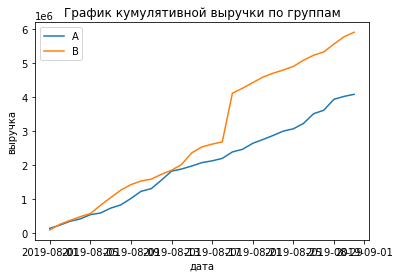

In [15]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.legend() 
plt.title("График кумулятивной выручки по группам")
plt.xlabel('дата')
plt.ylabel('выручка');

Обе кривых графика имеют подобное изменение. До определенного момента они даже имеют схожие значения. В один день прослеживается резкий скачок выручки для группы B, что может быть связано с какой-то одной крупной покупкой (опт как варинт)

#### Строим график кумулятивного среднего чека по группам

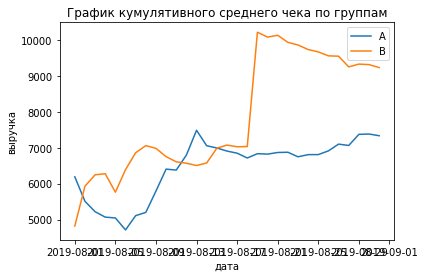

In [16]:
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.legend() 
plt.title('График кумулятивного среднего чека по группам')
plt.xlabel('дата')
plt.ylabel('выручка');

Значения среднего чека приходят к равномерному распределению, но из-за выброса в группе B, графики имеют схожее поведение, но разные значения

#### Строим график относительного изменения кумулятивного среднего чека группы B к группе A

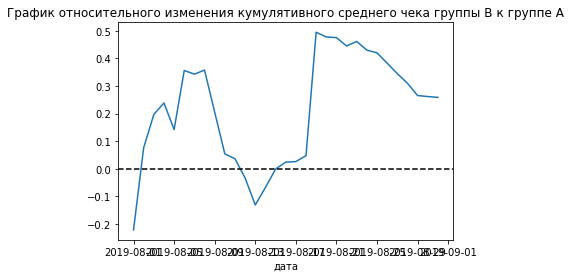

In [17]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--') 
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.xlabel('дата');

График относительного изменения кумулятивного среднего чека имеет сильные скачки значений одной группы относительно другой

#### Строим график кумулятивного среднего количества заказов на посетителя по группам

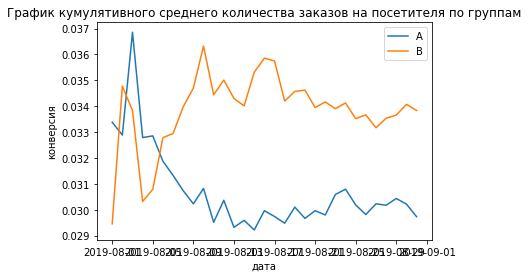

In [18]:
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()
plt.title('График кумулятивного среднего количества заказов на посетителя по группам')
plt.xlabel('дата')
plt.ylabel('конверсия');

График кумулятивного количества заказов выровнялся и показывает схожее изменение. Количество заказов в группе B, пропорционально больше количеству заказов в группе A

#### Строим график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A

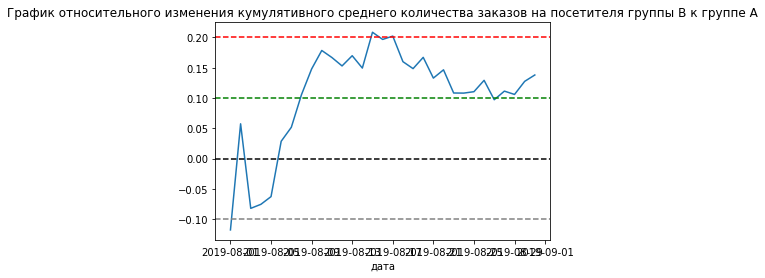

In [19]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост среднего кол-ва заказов группы B относительно группы A")

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=-0.1, color='grey', linestyle='--')
plt.axhline(y=0.1, color='green', linestyle='--')
plt.axhline(y=0.2, color='red', linestyle='--')
plt.title('График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A')
plt.xlabel('дата');

График относительного изменения кумулятивного среднего количества заказов на посетителя в группе B имеет значения выше средних в группе A

#### Строим точечный график количества заказов по пользователям

In [20]:
 ordersByUsers = (
    orders.groupby('visitor_id', as_index=False)
    .agg({'transaction_id': 'nunique'})
)

ordersByUsers.columns = ['visitor_id', 'orders']

ordersByUsers.sort_values(by='orders', ascending=False).head(10)

,visitor_id,orders
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5
744,3062433592,5
55,237748145,5
917,3803269165,5
299,1230306981,5
897,3717692402,5


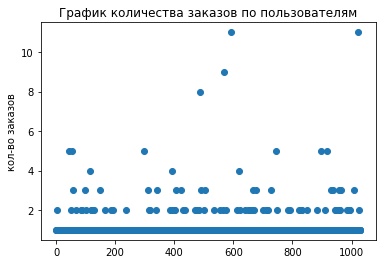

In [21]:
x_values = pd.Series(range(0, len(ordersByUsers)))
plt.scatter(x_values, ordersByUsers['orders']) 
plt.title('График количества заказов по пользователям')
plt.ylabel('кол-во заказов');

В основном, все делают один заказ, иногда два и три. Больше 3 заказов делают крайне редко. 

#### Считаем 95-й и 99-й перцентили количества заказов на пользователя

In [22]:
np.percentile(ordersByUsers['orders'], [90, 95, 99])

array([1., 2., 4.])

Не более 5% пользователей совершали более двух заказов. И не более 1% пользователей - больше четырех заказов

#### Строим точечный график стоимостей заказов

,transaction_id,visitor_id,date,revenue,group
425,590470918,1920142716,2019-08-19,1294500,B
1196,3936777065,2108080724,2019-08-15,202740,B
858,192721366,1316129916,2019-08-27,93940,A
1136,666610489,1307669133,2019-08-13,92550,A
744,3668308183,888512513,2019-08-27,86620,B
682,1216533772,4266935830,2019-08-29,78990,B
662,1811671147,4266935830,2019-08-29,78990,A
743,3603576309,4133034833,2019-08-09,67990,A
1103,1348774318,1164614297,2019-08-12,66350,A
1099,316924019,148427295,2019-08-12,65710,A


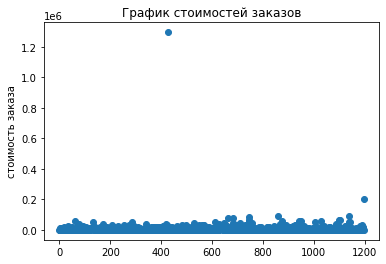

In [23]:
display(orders.sort_values(by='revenue', ascending=False).head(10))
x_values = pd.Series(range(0, len(orders['revenue'])))
plt.scatter(x_values, orders['revenue']) 
plt.title('График стоимостей заказов')
plt.ylabel('стоимость заказа');

Заказов на сумму больше 100 тысяч всего два. Оба выглядят аномально - один за 200 тыс. рублей, второй за 1.2 млн

#### Считаем 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.

In [24]:
np.percentile(orders['revenue'], [90, 95, 99])

array([18168. , 28000. , 58233.2])

Не более 5% заказов были на сумму более 28000 рублей. И не больше, чем у 1% заказов - дороже 58233 рублей

#### Считаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным

In [25]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'visitor_id': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'visitor_id': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

print(data.head(5)) 

        date  ordersPerDateA  revenuePerDateA  ordersPerDateB  \
0 2019-08-01  20              148579           20               
1 2019-08-02  19              93822            23               
2 2019-08-03  24              112473           16               
3 2019-08-04  15              70825            16               
4 2019-08-05  25              124218           23               

   revenuePerDateB  ordersCummulativeA  revenueCummulativeA  \
0  101217           20                  148579                
1  165531           39                  242401                
2  114248           63                  354874                
3  108571           78                  425699                
4  92428            103                 549917                

   ordersCummulativeB  revenueCummulativeB  visitorsPerDateA  \
0  20                  101217               719                
1  43                  266748               619                
2  59                  380996         

In [26]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitor_id', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitor_id', 'orders']

sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

display("P-value = {0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

display(" Различие в средних = {0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))
 

'P-value = 0.017'

' Различие в средних = 0.138'

Нулевая гипотеза - статистически значимых различий в среднем числе заказов между группами нет. <br>
Альтернативная гипотеза - Значимые различия в среднем числе заказов есть. <br>
По данным P-value значительно меньше 0.05, потому нулевую гипотезу отвергаем. Анализ "сырых данных" показывает, что в среднем количестве заказов между группами есть статистически значимые различия. <br> Относительный прирост среднего группы B  к конверсии группы A равен 13.8%

#### Считаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным

In [27]:
display('{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
display('{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 

'0.729'

'0.259'

P-value больше 0.05 - статистически значимых отличий в среднем чеке между группами нет, но относительное различие среднего чека между сегментами 25.9%

#### Считаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным

In [28]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 2]['visitor_id'],
        ordersByUsersB[ordersByUsersB['orders'] > 2]['visitor_id'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > np.percentile(orders['revenue'], 95)]['visitor_id']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5))
#выводим аномальные значения

1099    148427295
18      199603092
928     204675465
23      237748145
37      249864742
Name: visitor_id, dtype: int64


Нулевая гипотеза - статистически значимых различий в среднем числе заказов между группами по "очищенным данным" нет.
Альтернативная гипотеза - Значимые различия в среднем числе заказов по "очищенным данным" есть. 

In [29]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitor_id'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitor_id'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)
print('{0:.5f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

0.01304
0.173


Как и в случае с сырыми данными, статистическая значимость достигнута. Сегмент B значительно лучше сегмента A

#### Считаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным

Нулевая гипотеза - статистически значимых различий в среднем чеке заказа между группами по "очищенным" данным нет. <br>
Альтернативная гипотеза - Значимые различия в среднем чеке заказов по "очищенным" данным есть.

In [30]:
print(
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

0.738
-0.020


P-value уменьшился крайне незначительно. В то же время разница между сегментами сократилась до 2.3%

Примите решение по результатам теста и объясните его. Варианты решений:
1. Остановить тест, зафиксировать победу одной из групп.
2. Остановить тест, зафиксировать отсутствие различий между группами.
3. Продолжить тест.

### Результаты исследования:

Остановить тест, зафиксировать победу одной из групп. <br>
* Статистическая значимость различия в среднем количестве заказов на посетителя между группами достигнута. Относительный прирост среднего группы B к конверсии группы A равен 13.8%
* Нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по данным после фильтрации аномалий
* График различия среднего количества заказов между группами сообщает, что результаты группы B лучше группы A и нет значительной тенденции к ухудшению